In [15]:
# Importing necessary libraries
import pandas as pd               # For data manipulation
import numpy as np                # For numerical operations
import seaborn as sns             # For visualization
import matplotlib.pyplot as plt   # For plotting graphs
from sklearn.model_selection import train_test_split, GridSearchCV  # To split the data and for hyperparameter tuning
from sklearn.preprocessing import StandardScaler      # To standardize the data
from sklearn.neighbors import KNeighborsClassifier    # To implement the KNN algorithm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score  # For performance metrics

print("Libraries loaded successfully.")


Libraries loaded successfully.


In [16]:
# Loading the dataset
# Ensure that 'diabetes.csv' is in the same directory as this notebook or provide the full path to the file
df = pd.read_csv('diabetes.csv')
print("Dataset loaded successfully.\n")
print(df.head())  # Displaying the first few rows of the dataset to understand its structure


Dataset loaded successfully.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  


In [17]:
# Checking for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Checking for duplicates and removing them if present
df.drop_duplicates(inplace=True)
print("\nData after removing duplicates:\n", df.info())

# Checking for any outliers in numeric columns (optional based on dataset inspection)
print("\nDescriptive statistics:\n", df.describe())



Missing values in each column:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Data after removing duplicates:
 None

Descriptive statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
cou

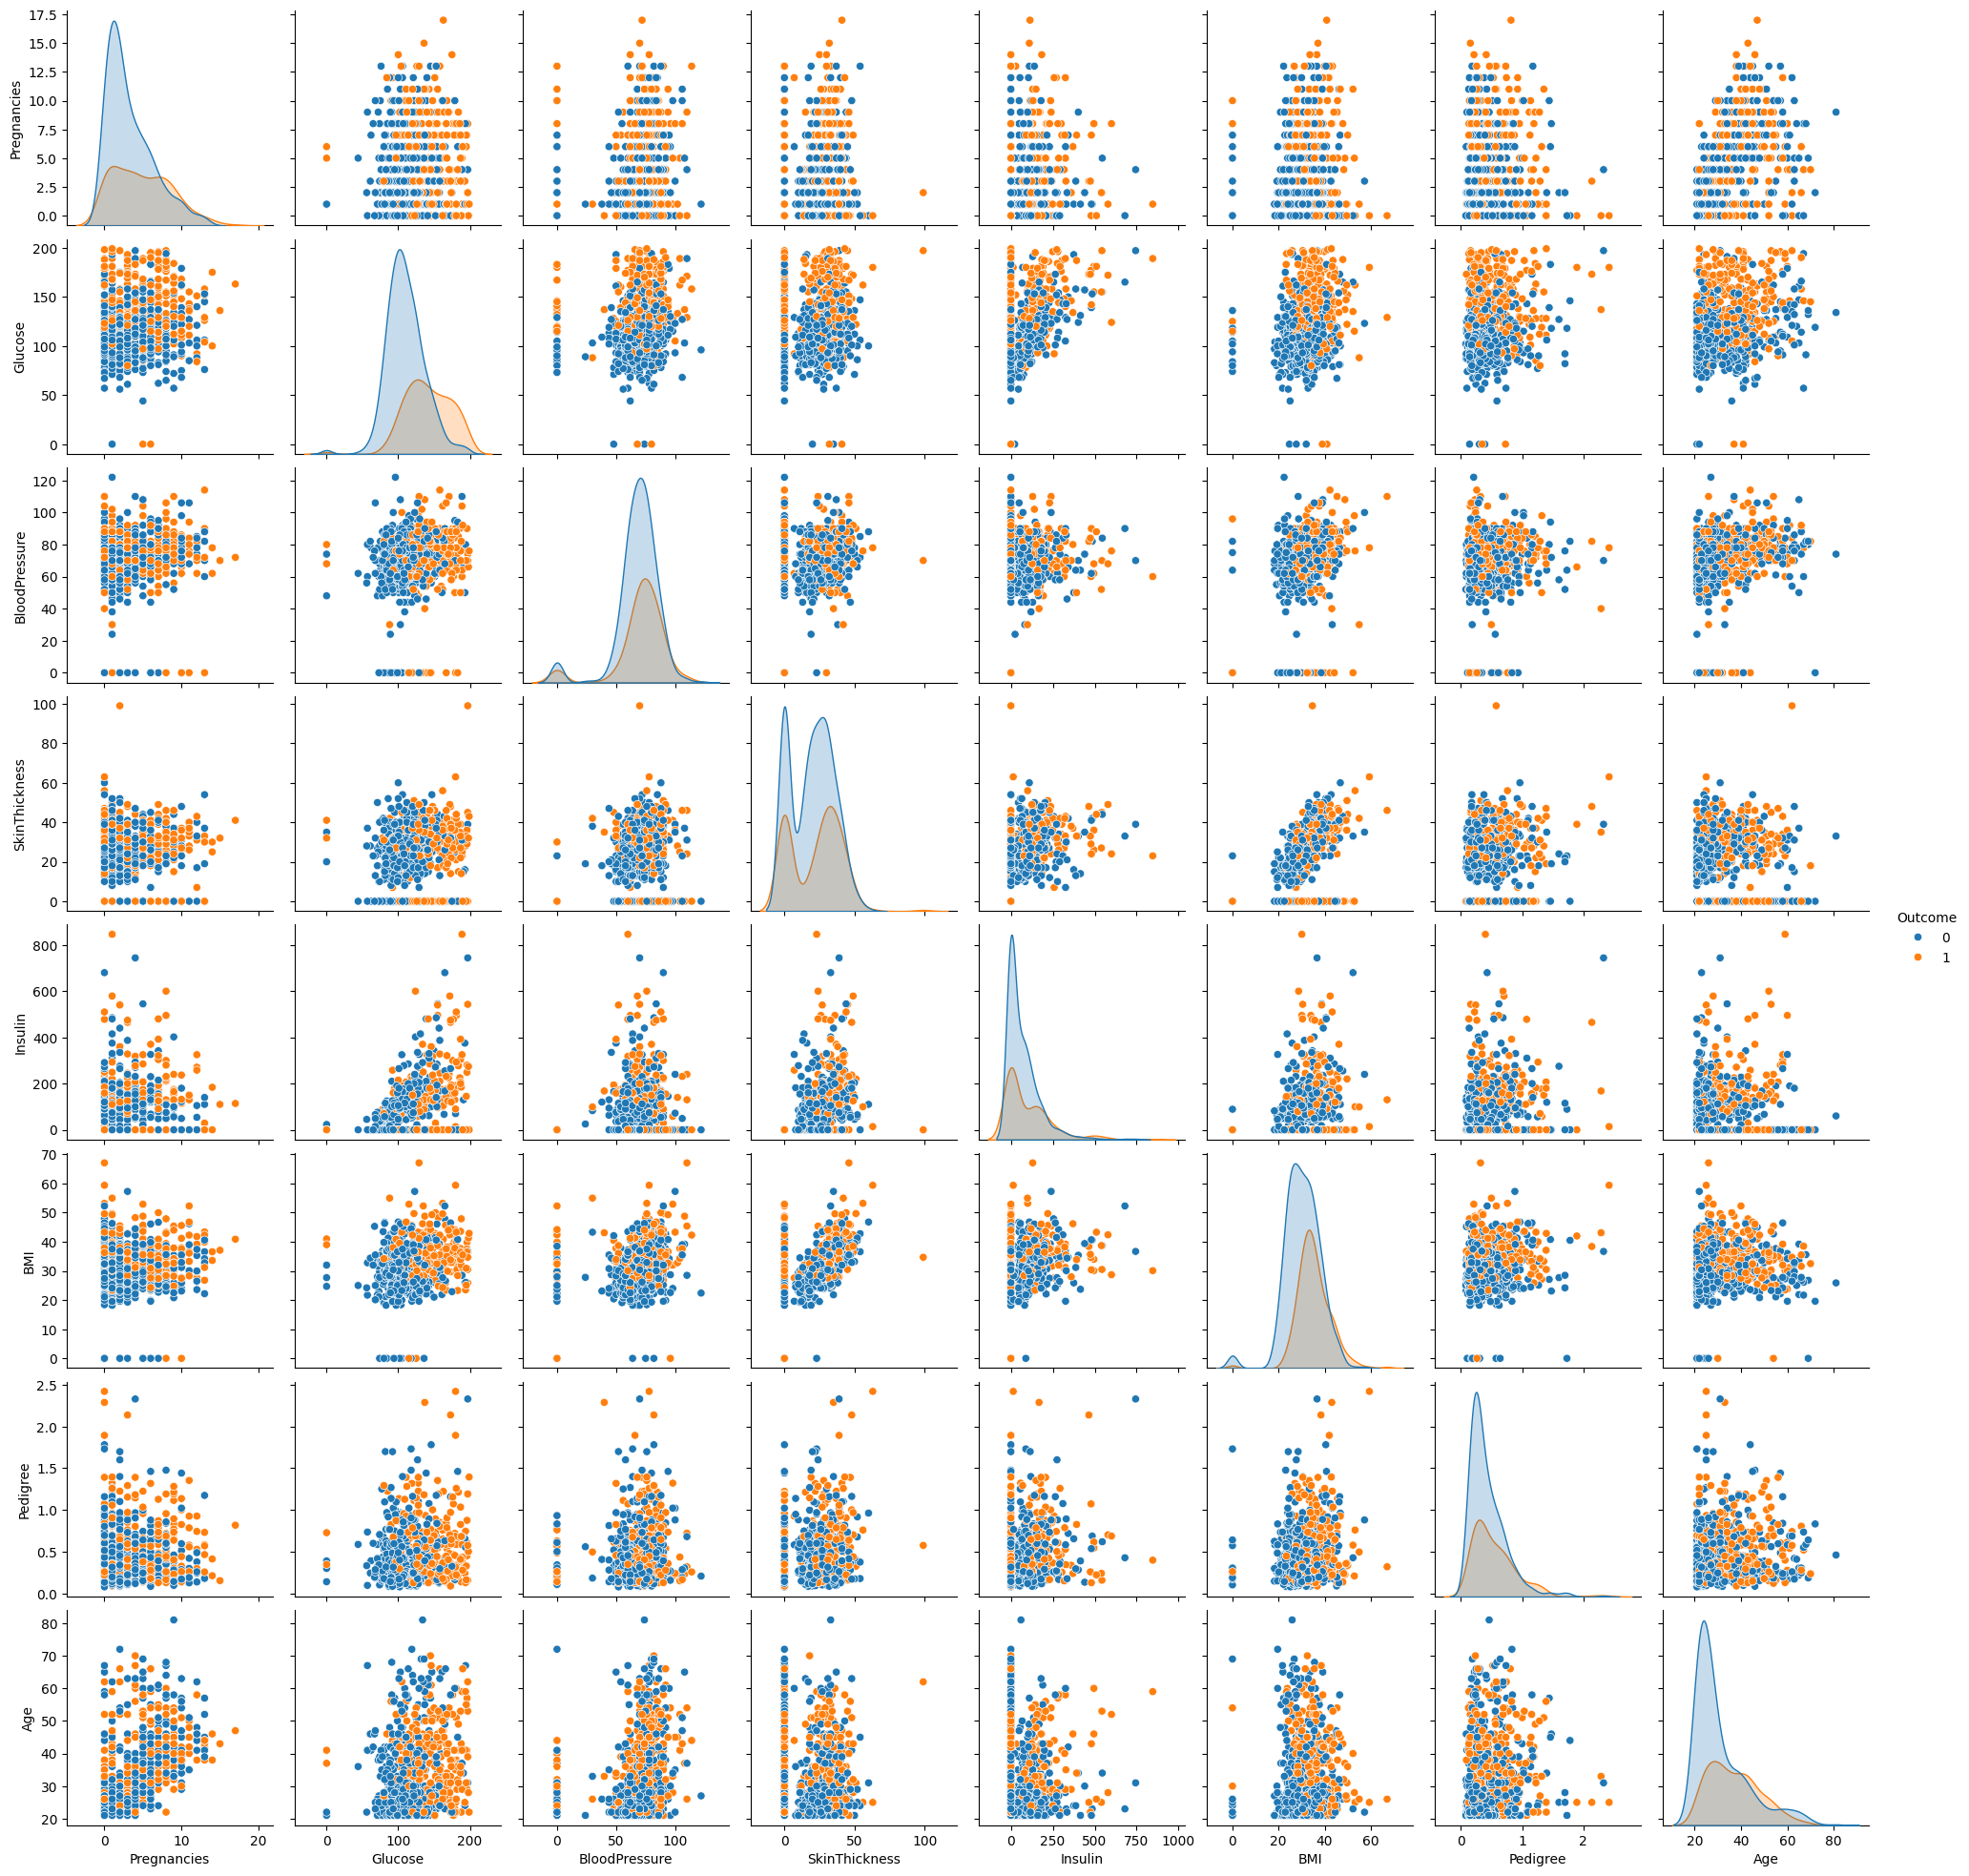

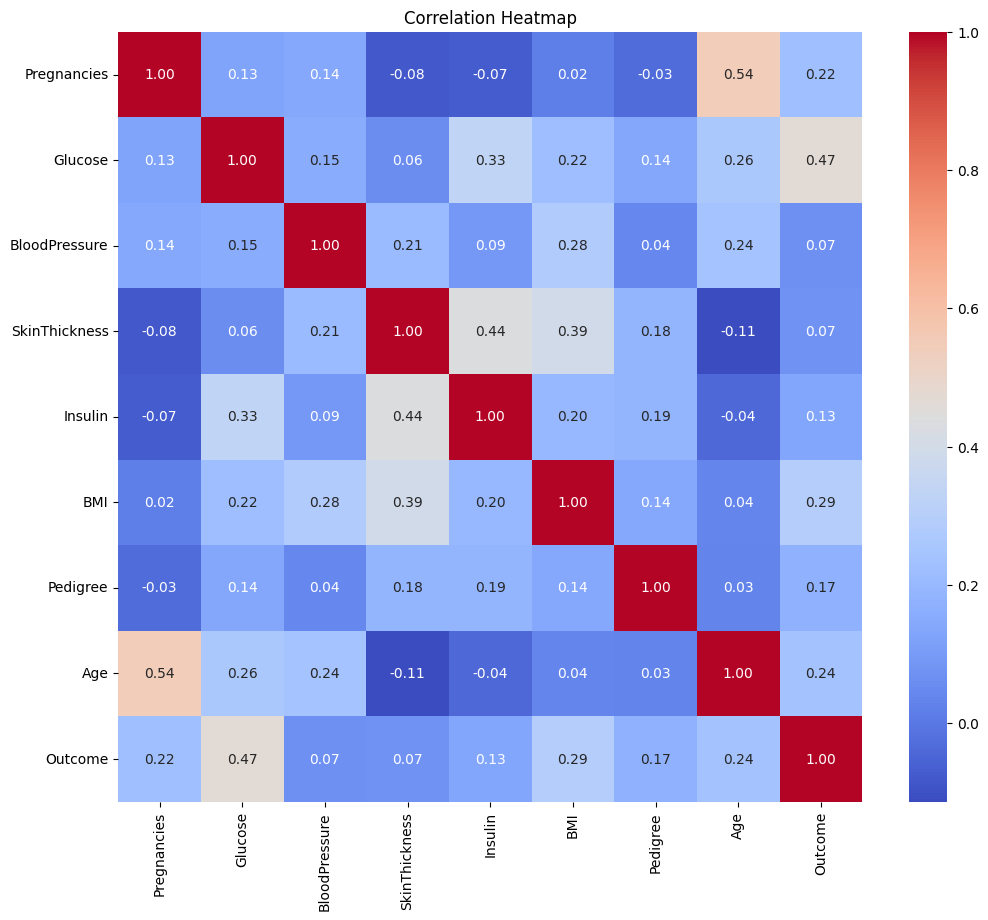

In [18]:
# Pairplot to visualize relationships in data
sns.pairplot(df, hue="Outcome")
plt.show()

# Correlation heatmap to understand the relationships between features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [19]:
# Separating features (X) and target variable (y)
X = df.drop('Outcome', axis=1)  # Dropping the target column 'Outcome' to get feature data
y = df['Outcome']               # Assigning the 'Outcome' column as the target variable

print("Features and target variable separated.")


Features and target variable separated.


In [20]:
# Splitting the data into training and testing sets
# 80% of data is used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")


Data split into training and testing sets.


In [21]:
# Standardizing the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fitting and transforming the training data
X_test = scaler.transform(X_test)        # Transforming the testing data (without refitting the scaler)
print("Feature data standardized.")


Feature data standardized.


In [22]:
# Initializing the K-Nearest Neighbors classifier with k=5 (can be changed)
knn = KNeighborsClassifier(n_neighbors=5)

# Training the KNN model on the training data
knn.fit(X_train, y_train)
print("KNN model trained successfully.")


KNN model trained successfully.


In [30]:
# Check for missing or NaN values in the training and test sets
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())

# Check data types in X_train and X_test
print("Data types in X_train:\n", pd.DataFrame(X_train).dtypes)
print("Data types in X_test:\n", pd.DataFrame(X_test).dtypes)


NaN values in X_train: 0
NaN values in X_test: 0
Data types in X_train:
 0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
dtype: object
Data types in X_test:
 0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
dtype: object


In [31]:
# Replace NaNs or infinite values with zero
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
print("Replaced NaN and infinite values with zero in X_train and X_test.")


Replaced NaN and infinite values with zero in X_train and X_test.


In [32]:
# Performing hyperparameter tuning using GridSearchCV to find the optimal number of neighbors (k)
param_grid = {'n_neighbors': np.arange(1, 31)}  # Range of k values to test
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Displaying the best parameters and the best score
print("Best parameters for KNN:", grid.best_params_)
print("Best cross-validated score:", grid.best_score_)

# Updating the model with the best number of neighbors
best_k = grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
print(f"\nKNN model retrained with optimal k={best_k}.")


Best parameters for KNN: {'n_neighbors': np.int64(11)}
Best cross-validated score: 0.7606024256963881

KNN model retrained with optimal k=11.


In [33]:
# Making predictions on the test set
y_pred = knn.predict(X_test)
print("Predictions made on the test set.")


Predictions made on the test set.


In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[78 21]
 [24 31]]


In [35]:
# Accuracy: Proportion of correctly predicted instances out of total instances
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")



Accuracy: 70.78%


In [36]:
# Error Rate: Proportion of incorrectly predicted instances out of total instances
error_rate = 1 - accuracy
print(f"Error Rate: {error_rate * 100:.2f}%")


Error Rate: 29.22%


In [37]:
# Precision: Proportion of true positives out of all positive predictions
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")


Precision: 0.60


In [38]:
# Recall: Proportion of true positives out of all actual positives
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")


Recall: 0.56
